##Introduction to Neural Networks:

**Introduction:**

Neural networks, primarily known for their applications in classification tasks, can also be employed for regression problems. In this exercise, we aim to demonstrate the usage of a simple neural network in predicting a linear relationship between input features and the output.

**Objective:**

The primary objective is to predict the output value y based on two input features x1 and x2 using a basic neural network model with the equation y=3x1+4x2. The neural network will be trained using a feed-forward and back-propagation mechanism to minimize the error between the predicted and actual values.

**Methodology:**

1. Activation Functions
2. Sample Data
3. Feed Forward
4. Error Calculation
5. Back Propagation
6. Training
7. Visualization


**Expected Outcome:**
After sufficient training, the predicted ypred should be close to the actual value yactual=17. The error graph should show a declining trend, indicating that the model is learning and improving its predictions over time.

##1. Activation Functions:
● Define the sigmoid function, a popular activation function used in neural
networks.

● Define the tanh function, which is another common activation function that returns values between -1 and 1.

● Define the relu function, which returns positive values as they are and
zeroes out negative values.

In [5]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [11]:
# Sigmoid Function
# s(x) = 1/(1+e^(-x)), where e ≈ 2.71

def sigmoid(x):
  s = 1/(1+math.e**(-x))
  return s


In [12]:
sigmoid(5)

0.9933071490757153

In [13]:
# Tanh Function
# tanh(x) = (e^(x) - e^(-x)) / (e^(x) + e^(-x))

def tanh(x):
  num  = (np.e**(x) - np.e**(-x))
  deno = (np.e**(x) + np.e**(-x))
  tan_fun = num/deno
  return tan_fun

In [16]:
tanh(5)

0.999909204262595

In [17]:
# Relu Function
# Relu(x) = x  when x>=0
#           0  when x<0

def relu(x):
  if x>=0:
    return x
  else:
    return 0

In [18]:
relu(5)

5

## 2. Sample Data:
● Use the following sample data for training: x1=3, x2=2, yactual=17


In [30]:
x1 = 3
x2 = 2
yactual = 17

# 3. Feed Forward:<br>
● Initialize the random weights w1 and w2 between 1 and 10.<br>
● Predict the output ypred using the equation ypred= x1 x w1 + x2 x w2

In [53]:
w1 = np.random.randint(1, 10)
w2 = np.random.randint(1, 10)

def feed_forward(x1,x2):
  ypred = x1*w1 + x2*w2
  return ypred

In [35]:
ypred = feed_forward(5,4)
print(f"The Weights are:{w1,w2}")
print(f"The predicted value is: {ypred}")

The Weights are:(7, 6)
The predicted value is: 59


# 4. Error Calculation:<br>
● Compute the squared error as error = (yactual-ypred)*(yactual-ypred)

In [36]:
# error = (yactual - ypred)^2

squared_error = (yactual - ypred)**2
print(f"Actual value is: {yactual}")
print(f"Predicted value is: {ypred}")
print(f"Squared value is: {squared_error}")

Actual value is: 17
Predicted value is: 59
Squared value is: 1764


## 5. Back Propagation:

● Compute the gradients of the error with respect to the weights.

● Update the weights using the computed gradients and a learning rate.

In [55]:
# # Calculate derivates
# # w1 = w1 - de/dw

# dedw1 = 2*(yactual-ypred)*(-x1)
# dedw2 = 2*(yactual-ypred)*(-x2)

# # Weightage Updation
# w1 = w1 - dedw1
# w2 = w2 - dedw2

In [40]:
#weight new (w_new) = weight old (w_old)- learning rate (dL/dw)
#dL/dw - derivative of Loss wrt derivate of weight (slope of weight), here w = w_old
#dL/dw = dLoss/dOutput * dOutput/dWeight,    here Output is the weight related to the weight

lr_rate = 0.01
def back_propogate(weight, loss):
  weight_new = weight - (lr_rate*(loss/weight))
  return weight_new

w1_new = back_propogate(w1, squared_error)
w2_new = back_propogate(w2, squared_error)
print(f"Old and New weight 1 are : {w1,w1_new} Old and New weight 2 are : {w2,w2_new}")

Old and New weight 1 are : (7, 4.48) Old and New weight 2 are : (6, 3.06)


## 6. Training:

● The above steps (Feed Forward to Back Propagation) are performed
iteratively (20 times in this example) to refine the weights and minimize
the error.

In [57]:

lr = 0.01
w1 = np.random.randint(1, 10)
w2 = np.random.randint(1, 10)
w1_list = []
w2_list = []
error_list = []
y_pred_list = []

for epoch in range(20):
  # Collect info in list
  w1_list.append(w1)
  w2_list.append(w2)

  # Feed Forward
  # Affin Equation
  ypred = x1*w1 + x2*w2
  y_pred_list.append(ypred)

  # Error Calculation
  # error
  error = (yactual - ypred)**2
  error_list.append(error)

  # back Prop
  # Calculate the derivates
  dedw1 = 2*(yactual-ypred)*(-x1)
  dedw2 = 2*(yactual-ypred)*(-x2)

  # Update the weights
  w1 = w1 - lr * dedw1
  w2 = w2 - lr * dedw2
print(f"Value of y_predicted: {ypred} & should be close to {yactual}")

Value of y_predicted: 17.03604087780619 & should be close to 17


## 7. Visualization:

    ● Plot the progression of the error across epochs.
    ● Plot the progression of ypred across epochs

0.0012989448730407372


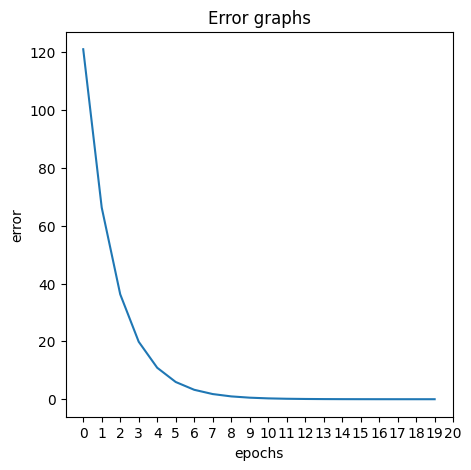

In [58]:
# Error across the epochs
plt.figure(figsize=(5, 5))
plt.plot(error_list)
plt.title("Error graphs")
plt.xticks(np.arange(0, 21))
plt.xlabel("epochs")
plt.ylabel("error")
print(error)

Y Actual is : 17
Y Predicted is 17.04


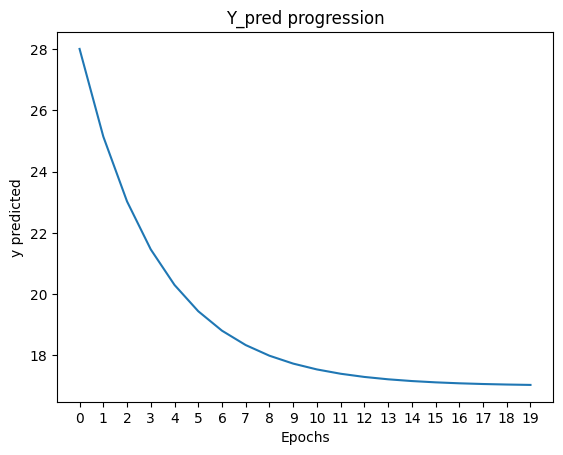

In [61]:
print(f"Y Actual is : {yactual}")
print(f"Y Predicted is {np.round(ypred,2)}")
plt.xticks(np.arange(0, 21))
plt.title("Y_pred progression")
plt.xlabel("Epochs")
plt.ylabel("y predicted")
plt.plot(y_pred_list)
